In [1]:
import itertools
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import math
from sklearn import metrics
from random import randint
from matplotlib import style
import seaborn as sns
import wrangle as wr

# plotting defaults
plt.rc('figure', figsize=(10, 4))
plt.rc('font', size=16)

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

In [2]:
#wrangle file pulls in data from swl data base and spits into dataframe of total df and by class df's
df,ds_df, web_df, staff_df = wr.prepare_log()

### 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?

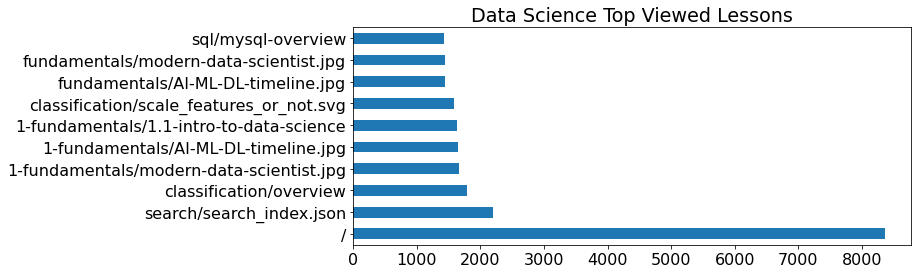

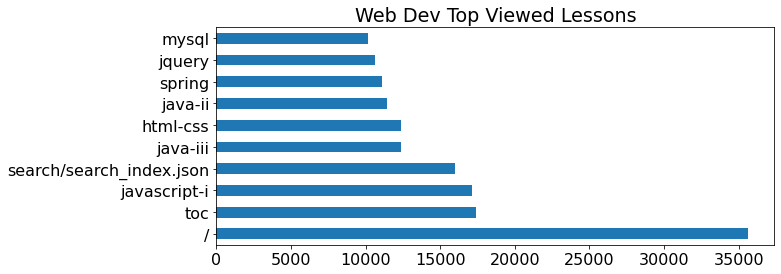

In [3]:
ds_df.endpoint.value_counts(dropna=False).head(10).plot.barh()
plt.title("Data Science Top Viewed Lessons")
plt.show()
web_df.endpoint.value_counts(dropna=False).head(10).plot.barh()
plt.title("Web Dev Top Viewed Lessons")
plt.show()

#### Takeaways
- For Data Science the most viewed lesson was the overview of classification

- For Web Development the most viewed lesson was Javascript-i

### Which lessons are least accessed? 

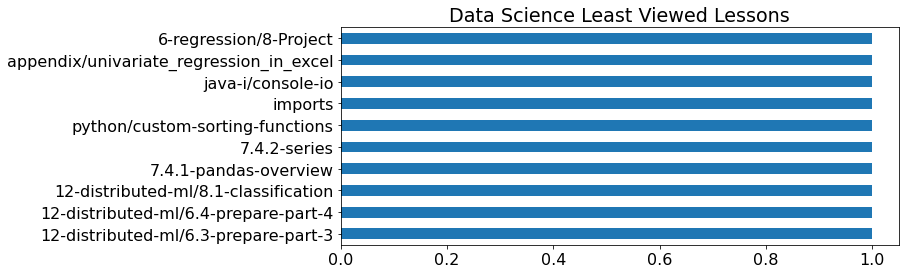

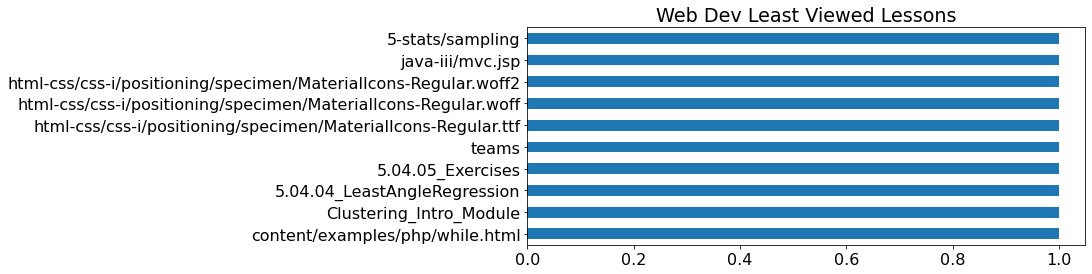

In [4]:
ds_df.endpoint.value_counts(dropna=False).tail(10).plot.barh()
plt.title("Data Science Least Viewed Lessons")
plt.show()
web_df.endpoint.value_counts(dropna=False).tail(10).plot.barh()
plt.title("Web Dev Least Viewed Lessons")
plt.show()

#### Takeaways
- For Data Science some of the least viewed lesson(s) were: appendix/univariate_regression_in_excel, java-i/console-io, python/custom-sorting-functions,imports

- For Web Development some of the least viewed lesson(s) were: essential-methods/traversing, ajax, jquery/whack-a-mole, spring/services, objects/math

## 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

In [5]:
page_by_cohort = df.groupby(['cohort_name'])['endpoint'].value_counts()
page_by_cohort =pd.DataFrame(page_by_cohort)
page_by_cohort.columns = ['endpoint_vc']
page_by_cohort = page_by_cohort.reset_index()
page_by_cohort = page_by_cohort[page_by_cohort['endpoint'] != '/']
page_by_cohort = page_by_cohort.set_index('cohort_name')
page_by_cohort

,endpoint,endpoint_vc
cohort_name,,
Andromeda,toc,638
Andromeda,javascript-i,516
Andromeda,spring,487
Andromeda,java-iii,433
Andromeda,java-ii,398
...,...,...
Zion,uploads/598dc43df39e2.jpg,1
Zion,web-design/intro,1
Zion,web-design/ui/visuals,1


In [6]:
max_page_by_cohort = page_by_cohort.groupby('cohort_name').max()

In [7]:
max_page_by_cohort_df = pd.DataFrame()
for x in max_page_by_cohort.index:
    df1 = page_by_cohort.loc[x][page_by_cohort.loc[x]['endpoint_vc'] == (max_page_by_cohort.loc[x]['endpoint_vc'])]
    max_page_by_cohort_df = pd.concat([max_page_by_cohort_df, df1])
max_page_by_cohort_df

,endpoint,endpoint_vc
cohort_name,,
Andromeda,toc,638
Apex,search/search_index.json,1497
Apollo,content/html-css,2
Arches,javascript-i,294
Badlands,content/php_ii/command-line,6
Bash,search/search_index.json,660
Bayes,1-fundamentals/modern-data-scientist.jpg,650
Betelgeuse,search/search_index.json,761
Ceres,search/search_index.json,1380


In [8]:
# Splitting it up by program
mpbc_ds = max_page_by_cohort_df[max_page_by_cohort_df.index.isin(ds_df.cohort_name)]
mpbc_web = max_page_by_cohort_df[max_page_by_cohort_df.index.isin(web_df.cohort_name)]


In [9]:
mpbc_ds.sort_values('endpoint_vc',ascending=False)

,endpoint,endpoint_vc
cohort_name,,
Darden,classification/overview,1109
Bayes,1-fundamentals/modern-data-scientist.jpg,650
Florence,fundamentals/modern-data-scientist.jpg,627
Curie,6-regression/1-overview,595
Easley,classification/scale_features_or_not.svg,463


In [10]:
# Went through each bottom number viewed lesson and compared views ended up with mkdocs/search_index.json as the lesson with the most significant difference
page_by_cohort[(page_by_cohort.index.isin(ds_df.cohort_name)) & (page_by_cohort.endpoint == 'classification/scale_features_or_not.svg')]

,endpoint,endpoint_vc
cohort_name,,
Bayes,classification/scale_features_or_not.svg,28
Curie,classification/scale_features_or_not.svg,96
Darden,classification/scale_features_or_not.svg,943
Easley,classification/scale_features_or_not.svg,463
Florence,classification/scale_features_or_not.svg,60


In [11]:
page_by_cohort[(page_by_cohort.index.isin(ds_df.cohort_name)) & (page_by_cohort.endpoint == 'fundamentals/modern-data-scientist.jpg')]

,endpoint,endpoint_vc
cohort_name,,
Bayes,fundamentals/modern-data-scientist.jpg,24
Curie,fundamentals/modern-data-scientist.jpg,100
Darden,fundamentals/modern-data-scientist.jpg,308
Easley,fundamentals/modern-data-scientist.jpg,379
Florence,fundamentals/modern-data-scientist.jpg,627


In [12]:
page_by_cohort[(page_by_cohort.index.isin(ds_df.cohort_name)) & (page_by_cohort.endpoint == 'classification/overview')]

,endpoint,endpoint_vc
cohort_name,,
Bayes,classification/overview,35
Curie,classification/overview,136
Darden,classification/overview,1109
Easley,classification/overview,445
Florence,classification/overview,60


In [13]:
mpbc_web.sort_values('endpoint_vc',ascending=False)

,endpoint,endpoint_vc
cohort_name,,
Jupiter,toc,1866
Apex,search/search_index.json,1497
Zion,toc,1465
Ceres,search/search_index.json,1380
Fortuna,toc,1293
Ganymede,search/search_index.json,1095
Hyperion,toc,1022
Wrangell,toc,991
Europa,toc,964


In [14]:
mpbc_web.endpoint.value_counts(dropna=False)

toc                                    10
javascript-i                            8
search/search_index.json                5
content/html-css                        3
spring                                  3
mkdocs/search_index.json                2
index.html                              2
content/php_ii/command-line             1
prework/databases                       1
prework/versioning/github               1
javascript-ii/es6                       1
java-iii                                1
html-css                                1
java-i                                  1
javascript-i/introduction/operators     1
content/laravel/intro                   1
Name: endpoint, dtype: int64

In [15]:
# Went through each bottom number viewed lesson and compared views ended up with mkdocs/search_index.json as the lesson with the most significant difference
page_by_cohort[(page_by_cohort.index.isin(web_df.cohort_name)) & (page_by_cohort.endpoint == 'mkdocs/search_index.json')]

,endpoint,endpoint_vc
cohort_name,,
Arches,mkdocs/search_index.json,56
Denali,mkdocs/search_index.json,1
Hampton,mkdocs/search_index.json,15
Kings,mkdocs/search_index.json,2
Lassen,mkdocs/search_index.json,18
Mammoth,mkdocs/search_index.json,1
Niagara,mkdocs/search_index.json,2
Olympic,mkdocs/search_index.json,1
Pinnacles,mkdocs/search_index.json,14


## Takeways
- For Web Dev a cohort that viewed a lesson the most that all other cohorts did not view as their max page was the Ulysses cohort that viewed 'mkdocs/search_index.json' lesson 721 times, the next highest Cohort was Teddy and they only viewed it 595 times in total.

- For Data Science a cohort that viewed a lesson the most that all other cohorts did not view as their max page was the Darden cohort that viewed the 'classification/overview' a whopping lesson 1109 times, the next highest Cohort was Easley and they only viewed it 445 times in total. 

### 3. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?

In [16]:
# unique pages visited 
ds_page= list(ds_df.endpoint.unique())

# list of unique pages in web dev
web_keyword = list(web_df.endpoint.unique())

# create a loop to cross check a page visited by ds students that matches with unique pages from web dev program

count= 0
for x in web_keyword:
    if x in ds_page:
        
        count+= 1       
print(count)

330


### Takeaways 
- There are 127 endpoints within the data science log that web development pages occur.
- Proving that at some point in time students were able to access both curriculums.

### 4. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

In [17]:
student_df = df[df.cohort_name != "Staff"]
student_df

,time,endpoint,user_id,ip,id,cohort_name,start_date,end_date,program_id
date,,,,,,,,,
2018-01-26,09:55:03,/,1,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26,09:56:02,java-ii,1,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26,09:56:05,java-ii/object-oriented-programming,1,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26,09:56:06,slides/object_oriented_programming,1,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26,09:56:24,javascript-i/conditionals,2,97.105.19.61,22.0,Teddy,2018-01-08,2018-05-17,2.0
...,...,...,...,...,...,...,...,...,...
2021-04-21,16:36:09,jquery/personal-site,869,136.50.98.51,135.0,Marco,2021-01-25,2021-07-19,2.0
2021-04-21,16:36:34,html-css/css-ii/bootstrap-grid-system,948,104.48.214.211,138.0,Neptune,2021-03-15,2021-09-03,2.0
2021-04-21,16:37:48,java-iii,834,67.11.50.23,134.0,Luna,2020-12-07,2021-06-08,2.0


In [18]:
active_df = student_df[(student_df.end_date >= student_df.index) & (student_df.start_date <= student_df.index)]
active_df = active_df[active_df['endpoint'] != '/']
active_df

,time,endpoint,user_id,ip,id,cohort_name,start_date,end_date,program_id
date,,,,,,,,,
2018-01-26,09:56:24,javascript-i/conditionals,2,97.105.19.61,22.0,Teddy,2018-01-08,2018-05-17,2.0
2018-01-26,09:56:41,javascript-i/loops,2,97.105.19.61,22.0,Teddy,2018-01-08,2018-05-17,2.0
2018-01-26,09:56:46,javascript-i/conditionals,3,97.105.19.61,22.0,Teddy,2018-01-08,2018-05-17,2.0
2018-01-26,09:56:48,javascript-i/functions,3,97.105.19.61,22.0,Teddy,2018-01-08,2018-05-17,2.0
2018-01-26,09:56:59,javascript-i/loops,2,97.105.19.61,22.0,Teddy,2018-01-08,2018-05-17,2.0
...,...,...,...,...,...,...,...,...,...
2021-04-21,16:36:09,jquery/personal-site,869,136.50.98.51,135.0,Marco,2021-01-25,2021-07-19,2.0
2021-04-21,16:36:34,html-css/css-ii/bootstrap-grid-system,948,104.48.214.211,138.0,Neptune,2021-03-15,2021-09-03,2.0
2021-04-21,16:37:48,java-iii,834,67.11.50.23,134.0,Luna,2020-12-07,2021-06-08,2.0


In [19]:
page_by_student = active_df.groupby(['user_id'])['endpoint'].value_counts()
page_by_student =pd.DataFrame(page_by_student)
page_by_student.columns = ['endpoint_vc']
page_by_student = page_by_student.reset_index()
page_by_student = page_by_student.groupby('user_id').sum('endpoint_vc')
page_by_student.nsmallest(n=5, columns='endpoint_vc')

,endpoint_vc
user_id,
832,2
278,3
539,4
956,4
388,7


In [20]:
active_df[active_df.user_id == 832]

,time,endpoint,user_id,ip,id,cohort_name,start_date,end_date,program_id
date,,,,,,,,,
2020-12-07,14:22:38,javascript-i,832,69.154.52.98,62.0,Jupiter,2020-09-21,2021-03-30,2.0
2020-12-07,14:22:39,html-css,832,69.154.52.98,62.0,Jupiter,2020-09-21,2021-03-30,2.0


In [21]:
active_df[active_df.user_id == 278]

,time,endpoint,user_id,ip,id,cohort_name,start_date,end_date,program_id
date,,,,,,,,,
2018-09-27,14:47:37,java-ii/arrays,278,107.77.217.9,24.0,Voyageurs,2018-05-29,2018-10-11,2.0
2018-09-27,14:58:48,java-ii/arrays,278,107.77.217.9,24.0,Voyageurs,2018-05-29,2018-10-11,2.0
2018-09-27,14:59:07,java-ii/collections,278,107.77.217.9,24.0,Voyageurs,2018-05-29,2018-10-11,2.0


In [22]:
active_df[active_df.user_id == 539]

,time,endpoint,user_id,ip,id,cohort_name,start_date,end_date,program_id
date,,,,,,,,,
2019-11-04,16:19:34,toc,539,97.105.19.58,52.0,Europa,2019-11-04,2020-04-17,2.0
2019-11-04,16:54:02,html-css,539,97.105.19.58,52.0,Europa,2019-11-04,2020-04-17,2.0
2019-11-04,16:54:38,html-css/introduction,539,97.105.19.58,52.0,Europa,2019-11-04,2020-04-17,2.0
2019-11-04,16:54:45,html-css/elements,539,97.105.19.58,52.0,Europa,2019-11-04,2020-04-17,2.0


In [23]:
active_df[active_df.user_id == 956]

,time,endpoint,user_id,ip,id,cohort_name,start_date,end_date,program_id
date,,,,,,,,,
2021-04-15,14:54:10,toc,956,162.200.114.251,139.0,Oberon,2021-04-12,2021-10-01,2.0
2021-04-15,14:55:05,javascript-i/introduction/operators,956,162.200.114.251,139.0,Oberon,2021-04-12,2021-10-01,2.0
2021-04-15,14:56:04,javascript-i/introduction/primitive-types,956,162.200.114.251,139.0,Oberon,2021-04-12,2021-10-01,2.0
2021-04-15,15:32:22,javascript-i/introduction/operators,956,162.200.114.251,139.0,Oberon,2021-04-12,2021-10-01,2.0
